In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

True

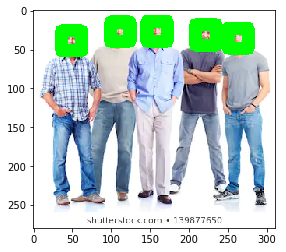

In [0]:

test_image = cv2.imread('/content/men.jpg')
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

plt.imshow(test_image_gray, cmap='gray')





def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



haar_cascade_face = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')




faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);



for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        

plt.imshow(convertToRGB(test_image))


def detect_faces(cascade, test_image, scaleFactor = 1.1):
    
    image_copy = test_image.copy()
    
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors = 5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy



test_image2 = cv2.imread('men.jpg')


faces = detect_faces(haar_cascade_face, test_image2)

plt.imshow(convertToRGB(faces))



cv2.imwrite('image1.png',faces)

In [0]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']

In [0]:
age_net=cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
  

In [0]:
image = cv2.imread('/content/men.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [0]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

In [0]:
for (x, y, w, h )in faces:
   cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
   face_img = image[y:y+h, h:h+w].copy()

In [0]:
blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

In [0]:
age_net.setInput(blob)
age_preds = age_net.forward()
age = age_list[age_preds[0].argmax()]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = load_model("/content/model.hdf5")
predicted_class = np.argmax(model.predict(image))

In [0]:
overlay_text = "%s %s" % (predicted_class, age)
cv2.putText(image, overlay_text, (x, y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)